## Block Number Interpolation

(currently using disambiguous v02)

1. Sequence Restriction

This notebook interpolates block numbers by filling in if unknown dwellings are in between known dwellings of the same
    1. block number
    2. block number and distance sequence
    3. block number, distance sequence, and enum_dist
    4. block number, distance sequence, enum_dist, and other sequence

2. Max Distance Restriction
3. In between number of dwellings



1. disambiguous and resolve conflicts [see Disambiguous_Analysis_ notebook for more detail]
2. Set the max number of dwellings between two known dwellings for sequence interpolation

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from interpolation import interpolation, CensusData, dataprocessing, sequences
from interpolation import disambiguation_analysis as da

# Setup

* Read in datasets and set column names

In [2]:
filled_1850 = pd.read_csv("../../data/dwelling_filled_sum_1850_mn_v02.csv")
cd_1850 = pd.read_csv("../../data/cd_1850_mn_20200918.csv") #For calculating centroids
enumerators = pd.read_csv("../../data/census_1850_enumerationDetail_mn_union.csv")

In [3]:
ward_col = "CENSUS_WARD_NUM"
dwelling_col = "dwelling_id"
block_col = "CD_BLOCK_NUM"
cd_ward_col = "CD_WARD_NUM"
cd_block_col = "CD_BLOCK_NUM"
dwelling_num_col = "CENSUS_DWELLING_NUM"
cd_address = "CD_H_ADDRESS"
pagenum = "CENSUS_PAGENUM"
x_col = "CD_X"
y_col = "CD_Y"

### CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM - CENSUS_ENUMERATOR_NUM - CENSUS_ENUMERATOR_DATE is a minimal key for all wards

* We have previously used only CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM for ward 10, is a minimal key for ward 10 specificaly
* **Need more specificity when merging this into all dwellings. Otherwise, 1 dwelling could be assigned to 2 different enumeration sequences**

In [4]:
print('KEY: CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM is a minimal key in')
unique_wards = []
for w in enumerators['CENSUS_WARD_NUM'].unique():
    tempw = enumerators.loc[enumerators['CENSUS_WARD_NUM'] == w]
    if tempw[['CENSUS_PAGENO_HOUSEHOLD', 'CENSUS_WARD_NUM']].shape[0] == tempw[['CENSUS_PAGENO_HOUSEHOLD', 'CENSUS_WARD_NUM']].drop_duplicates().shape[0]:
        print('ward ', w)
        unique_wards.append(w)

KEY: CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM is a minimal key in
ward  1
ward  2
ward  3
ward  4
ward  5
ward  6
ward  10
ward  13
ward  14
ward  15
ward  19


In [5]:
print('KEY: CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM - CENSUS_ENUMERATOR_NUM - CENSUS_ENUMERATOR_DATE is a minimal key in ')
for w in enumerators['CENSUS_WARD_NUM'].unique():
    tempw = enumerators.loc[enumerators['CENSUS_WARD_NUM'] == w]
    if tempw[['CENSUS_PAGENO_HOUSEHOLD', 'CENSUS_WARD_NUM', 'CENSUS_ENUMERATOR_NUM', 'CENSUS_ENUMERATOR_DATE']].shape[0] == tempw[['CENSUS_PAGENO_HOUSEHOLD', 'CENSUS_WARD_NUM', 'CENSUS_ENUMERATOR_NUM', 'CENSUS_ENUMERATOR_DATE']].drop_duplicates().shape[0]:
        print('ward ', w)

KEY: CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM - CENSUS_ENUMERATOR_NUM - CENSUS_ENUMERATOR_DATE is a minimal key in 
ward  1
ward  2
ward  3
ward  4
ward  5
ward  6
ward  7
ward  8
ward  9
ward  10
ward  11
ward  12
ward  13
ward  14
ward  15
ward  16
ward  17
ward  18
ward  19


## Skip some wards for now

* Wards that *CENSUS_PAGENO_HOUSEHOLD - CENSUS_WARD_NUM* is not a minimal key of are skipped for now

In [6]:
print('Consider only these wards: ', unique_wards)

Consider only these wards:  [1, 2, 3, 4, 5, 6, 10, 13, 14, 15, 19]


In [7]:
filled_1850 = filled_1850.loc[filled_1850[ward_col].isin(unique_wards)]
census_enumerators = filled_1850.merge(enumerators,  how = "left", left_on= [pagenum, ward_col], 
                                       right_on = ["CENSUS_PAGENO_HOUSEHOLD", "CENSUS_WARD_NUM"])
# census_enumerators.drop(columns=['PLACE', 'CENSUS_PAGENNO', 'ANCESTRY_REF', 'Notes', 'CENSUS_REEL_HOUSEHOLD'], inplace=True)

In [8]:
## Check uniqueness
filled_1850.shape[0] == census_enumerators.shape[0]

True

## Generate sequences

In [9]:
census_enum_seq = CensusData(census_enumerators, ward_col=ward_col, dwelling_col=dwelling_col, 
                             block_col =  block_col, x_col = x_col, y_col = y_col, pagenum = pagenum)
census_enum_seq.apply_sequencing(enumerator_dist = True, dwelling = True, 
                                 fixed = True, distance = True)

d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1
d:  0.1


In [13]:
census_all_dwellings = census_enum_seq.df.groupby([ward_col, dwelling_col], as_index = False).first()
dwellings_sequence = census_all_dwellings.dropna(subset=[block_col])

## 1. Get dwellings that are followed by unknown dwellings whose block num can be interpolated
## dwellings_sequence => known dwellings
dwelling_sequence_sames = interpolation.same_next(dwellings_sequence, column = block_col)
# dwelling_sequence_sames = dwellings_sequence.groupby(ward_col).agg(interpolation.same_next, block_col)

"""
2. Merge dwelling_sequence_sames back to all known dwelling df so that `BLOCK_NUM_next` and 
`num_between_real` are included in df of all known dwellings.
"""
dwellings_sequence_with_next_info = dwellings_sequence.merge(dwelling_sequence_sames[[ward_col, dwelling_col,
                                                                        block_col+'_next', 
                                                                                      'num_between_real',
                                                                                      'header']], 
                                                             on=[ward_col, dwelling_col], how='left')

In [17]:
all_dwellings_1 = dataprocessing.all_dwellings_sequenced(census_all_dwellings, dwellings_sequence_with_next_info, 
                                                       block_col = block_col, fill_column = block_col,
                                                       check_column = [block_col], ward_col = ward_col, dwelling_col = dwelling_col)

all_dwellings_2 = dataprocessing.all_dwellings_sequenced(census_all_dwellings, dwellings_sequence_with_next_info, 
                                                       block_col = block_col, fill_column = block_col,
                                                       check_column = [block_col, 'sequence_id'], ward_col = ward_col, dwelling_col = dwelling_col)

all_dwellings_3 = dataprocessing.all_dwellings_sequenced(census_all_dwellings, dwellings_sequence_with_next_info, 
                                                       block_col = block_col, fill_column = block_col,
                                                       check_column = [block_col, 'sequence_id', 'enum_dist_id'], ward_col = ward_col, dwelling_col = dwelling_col)

all_dwellings_4 = dataprocessing.all_dwellings_sequenced(census_all_dwellings, dwellings_sequence_with_next_info, 
                                                       block_col = block_col, fill_column = block_col,
                                                       check_column = [block_col, 'sequence_id', 
                                                                       'enum_dist_id', 'fixed_seq',
                                                                      'dwelling_seq_id'], ward_col = ward_col, dwelling_col = dwelling_col)

## Result

In [18]:
total_num_dwellings = census_all_dwellings.groupby([ward_col, dwelling_col]).ngroups
known_num_dwellings = census_all_dwellings.loc[~census_all_dwellings[block_col].isnull()].groupby([ward_col, dwelling_col]).ngroups

all_dwelling_list = [all_dwellings_1,all_dwellings_2, all_dwellings_3, all_dwellings_4]
in_between_num = 15
num_assigned_dwelling = []

print('Ward 10. Total number of Dwellings: ',total_num_dwellings)
for all_dwelling_x in all_dwelling_list:
    ##interpolated portion
    total_assigned_dwellings = all_dwelling_x.loc[~all_dwelling_x[block_col].isnull()].groupby([ward_col, dwelling_col]).ngroups
#     total_assigned_dwellings = with_block_num_dwellings.shape[0]
    num_assigned_dwelling.append(round((total_assigned_dwellings - known_num_dwellings)/total_num_dwellings, 5))
    
    print("Maximum of {} dwellings between".format(str(in_between_num)))
    print("Number of dwellings that would be assigned a block:", total_assigned_dwellings - known_num_dwellings)
    print("Proportion increase dwellings assigned a block:", round((total_assigned_dwellings - known_num_dwellings)/total_num_dwellings, 5), "\n")


Ward 10. Total number of Dwellings:  16702
Maximum of 15 dwellings between
Number of dwellings that would be assigned a block: 2930
Proportion increase dwellings assigned a block: 0.17543 

Maximum of 15 dwellings between
Number of dwellings that would be assigned a block: 2921
Proportion increase dwellings assigned a block: 0.17489 

Maximum of 15 dwellings between
Number of dwellings that would be assigned a block: 2239
Proportion increase dwellings assigned a block: 0.13406 

Maximum of 15 dwellings between
Number of dwellings that would be assigned a block: 2033
Proportion increase dwellings assigned a block: 0.12172 



Text(0.5, 1.0, 'Increase Proportion of Dwellings assigned a block')

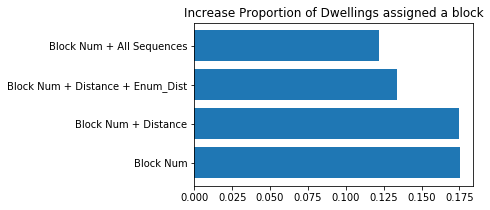

In [19]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.barh(['Block Num', 'Block Num + Distance', 'Block Num + Distance + Enum_Dist', 'Block Num + All Sequences'], num_assigned_dwelling)
# ax.scatter(num_between, num_assigned_dwelling)
ax.set_title("Increase Proportion of Dwellings assigned a block")

## Take a look at where they differ

* approach 1 (only looking at block num) and 2 (looking at block num + distance seqeunce) produce exact same output
* When approach 2 and 3 (~2 + enum_distance sequence) do not agree, approach is more reliable. Next known dwellings are still in the same block number. Enumerators start off their new days from where they left off the day before. 
* **Data in ward 10 supports the use of only distance sequence and block num to fill in missing block nums**

In [20]:
## both produce the same block number interpolation
(all_dwellings_1[block_col].replace(np.nan, -1) != all_dwellings_2[block_col].replace(np.nan, -1)).sum()

9

In [26]:
temp = all_dwellings_1[all_dwellings_1[block_col].replace(np.nan, -1) != all_dwellings_2[block_col].replace(np.nan, -1)]
all_dwellings_1[[ward_col, 'dwelling_id', block_col, 'sequence_id']].iloc[4685:4695]

,CENSUS_WARD_NUM,dwelling_id,CD_BLOCK_NUM,sequence_id
4685,5,996,mn1850_05_74.0096_40.7210,4688.0
4686,5,997,NaN,NaN
4687,5,998,NaN,NaN
4688,5,999,mn1850_05_74.0093_40.7203,4688.0
4689,5,1000,mn1850_05_74.0062_40.7210,4690.0
4690,5,1001,mn1850_05_74.0072_40.7222,4690.0
4691,5,1002,mn1850_05_74.0072_40.7222,NaN
4692,5,1003,mn1850_05_74.0072_40.7222,4694.0
4693,5,1004,mn1850_05_74.0087_40.7216,4694.0
4694,5,1005,mn1850_05_74.0094_40.7217,4694.0


In [21]:
## both produce the same block number interpolation
np.where(all_dwellings_3[block_col].replace(np.nan, -1) != all_dwellings_2[block_col].replace(np.nan, -1))

(array([  498,   499,   500,   501,   738,   773,   774,   841,   842,
          847,   848,   849,   850,   953,   954,   955,   956,   957,
          966,   967,  1132,  1133,  1134,  1239,  1240,  1341,  1342,
         1343,  1344,  1345,  1549,  1550,  1551,  1552,  1553,  1554,
         1555,  1556,  1557,  1558,  1559,  1560,  1561,  1562,  1563,
         1564,  1565,  1566,  1567,  1568,  1569,  1570,  1571,  1572,
         1573,  1574,  1575,  1576,  1577,  1578,  1579,  1690,  1694,
         1802,  1886,  1887,  1888,  1889,  1890,  1891,  1892,  1893,
         1894,  1895,  1896,  1897,  1898,  1899,  1900,  1901,  1902,
         1903,  1976,  2004,  2042,  2043,  2044,  2125,  2126,  2127,
         2151,  2246,  2292,  2334,  2335,  2336,  2337,  2526,  2527,
         2528,  2579,  2580,  2581,  2582,  2583,  2584,  2585,  2612,
         2613,  2614,  2615,  2616,  2660,  2661,  2673,  2686,  2746,
         2775,  2776,  2777,  2778,  2779,  2780,  2798,  2825,  2836,
      

In [ ]:
all_dwellings_2.merge(all_dwellings_3, on=[dwelling_col, 'sequence_id', 'enum_dist_id'],
                     how='left').iloc[105:130][['dwelling_id', 'block_num_x', 'block_num_y', 'sequence_id', 'enum_dist_id']]

In [ ]:
all_dwellings_2.merge(all_dwellings_3, on=[dwelling_col, 'sequence_id', 'enum_dist_id'],
                     how='left').iloc[300:320][['dwelling_id', 'block_num_x', 'block_num_y', 'sequence_id', 'enum_dist_id']]

In [ ]:
all_dwellings_2.merge(all_dwellings_3, on=[dwelling_col, 'sequence_id', 'enum_dist_id'],
                     how='left').iloc[1135:1155][['dwelling_id', 'block_num_x', 'block_num_y', 'sequence_id', 'enum_dist_id']]

# 2. Distance Threshold for distance sequence
# 3. In Between Num dwelling

In [ ]:
distance_threshold = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
in_between_num_list = num_between = [5,10,15, 20, 25,40, None]
result_inbetween_distthreshold = {}
for in_between_num in in_between_num_list:
    result_list = []
    for max_dist in distance_threshold:

        census_enum_seq.apply_sequencing(enumerator_dist = True, dwelling = True, 
                                         fixed = True, distance = True, d = max_dist)

        census_all_dwellings = census_enum_seq.df.groupby([ward_col, dwelling_col], as_index = False).first()
        dwellings_sequence = census_all_dwellings.dropna(subset=[block_col])

        ## 1. Get dwellings that are followed by unknown dwellings whose block num can be interpolated
        ## dwellings_sequence => known dwellings
        dwelling_sequence_sames = interpolation.same_next(dwellings_sequence, column = block_col)

        """
        2. Merge dwelling_sequence_sames back to all known dwelling df so that `BLOCK_NUM_next` and 
        `num_between_real` are included in df of all known dwellings.
        """
        dwellings_sequence_with_next_info = dwellings_sequence.merge(dwelling_sequence_sames[[ward_col, dwelling_col,
                                                                                block_col+'_next', 
                                                                                              'num_between_real',
                                                                                              'header']], 
                                                                     on=[ward_col, dwelling_col], how='left')

        all_dwellings = dataprocessing.all_dwellings_sequenced(census_all_dwellings, dwellings_sequence_with_next_info, 
                                                               block_col = block_col, fill_column = block_col,
                                                               check_column = [block_col, 'sequence_id'], ward_col = ward_col, 
                                                                 dwelling_col = dwelling_col, dwelling_max = in_between_num)

        ##interpolated portion
        total_assigned_dwellings = all_dwellings.loc[~all_dwellings[block_col].isnull()].groupby([ward_col, dwelling_col]).ngroups
        result_list.append(round((total_assigned_dwellings - known_num_dwellings)/total_num_dwellings, 5))

        print("Maximum of {} miles between each dwelling in a sequence".format(str(max_dist)))
        print("Maximum of {} dwellings in between".format(str(in_between_num)))
        print("Number of dwellings that would be assigned a block:", total_assigned_dwellings - known_num_dwellings)
        print("Proportion increase dwellings assigned a block:", round((total_assigned_dwellings - known_num_dwellings)/total_num_dwellings, 5), "\n")

        result_inbetween_distthreshold[in_between_num] = result_list

In [ ]:
pd.DataFrame(result_inbetween_distthreshold) ##row: distance threshold, col: in between num

* **Distance Threshold does not impact the block number interpolation**. (Same values along a column)

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(5,3))
# ax.plot(distance_threshold, result_list)
# ax.scatter(distance_threshold, result_list)
# ax.set_title("Increase Proportion of Dwellings assigned a block")
# ax.set_xlabel('Distance Threshold for Distance Sequence')